In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
input=data.drop(columns=['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin','Embarked'])
input.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [11]:
target=data['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
le_Sex=LabelEncoder()
input['Sex_n']=le_Sex.fit_transform(input['Sex'])
input_n=input.drop(columns=['Sex'])
input_n.head()

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


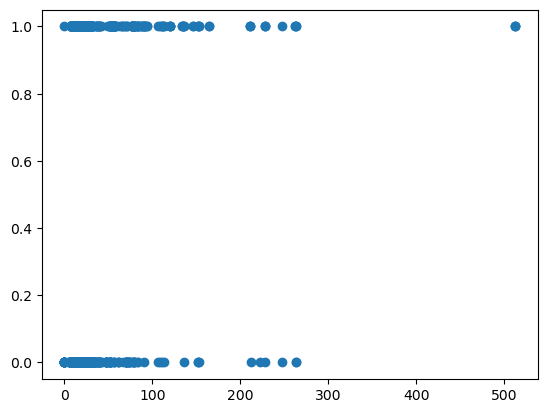

In [29]:
plt.scatter(input_n['Fare'],target)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(input_n,target,test_size=0.2)
len(y_train)

712

In [22]:
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
model.score(X_test,y_test)

0.8044692737430168

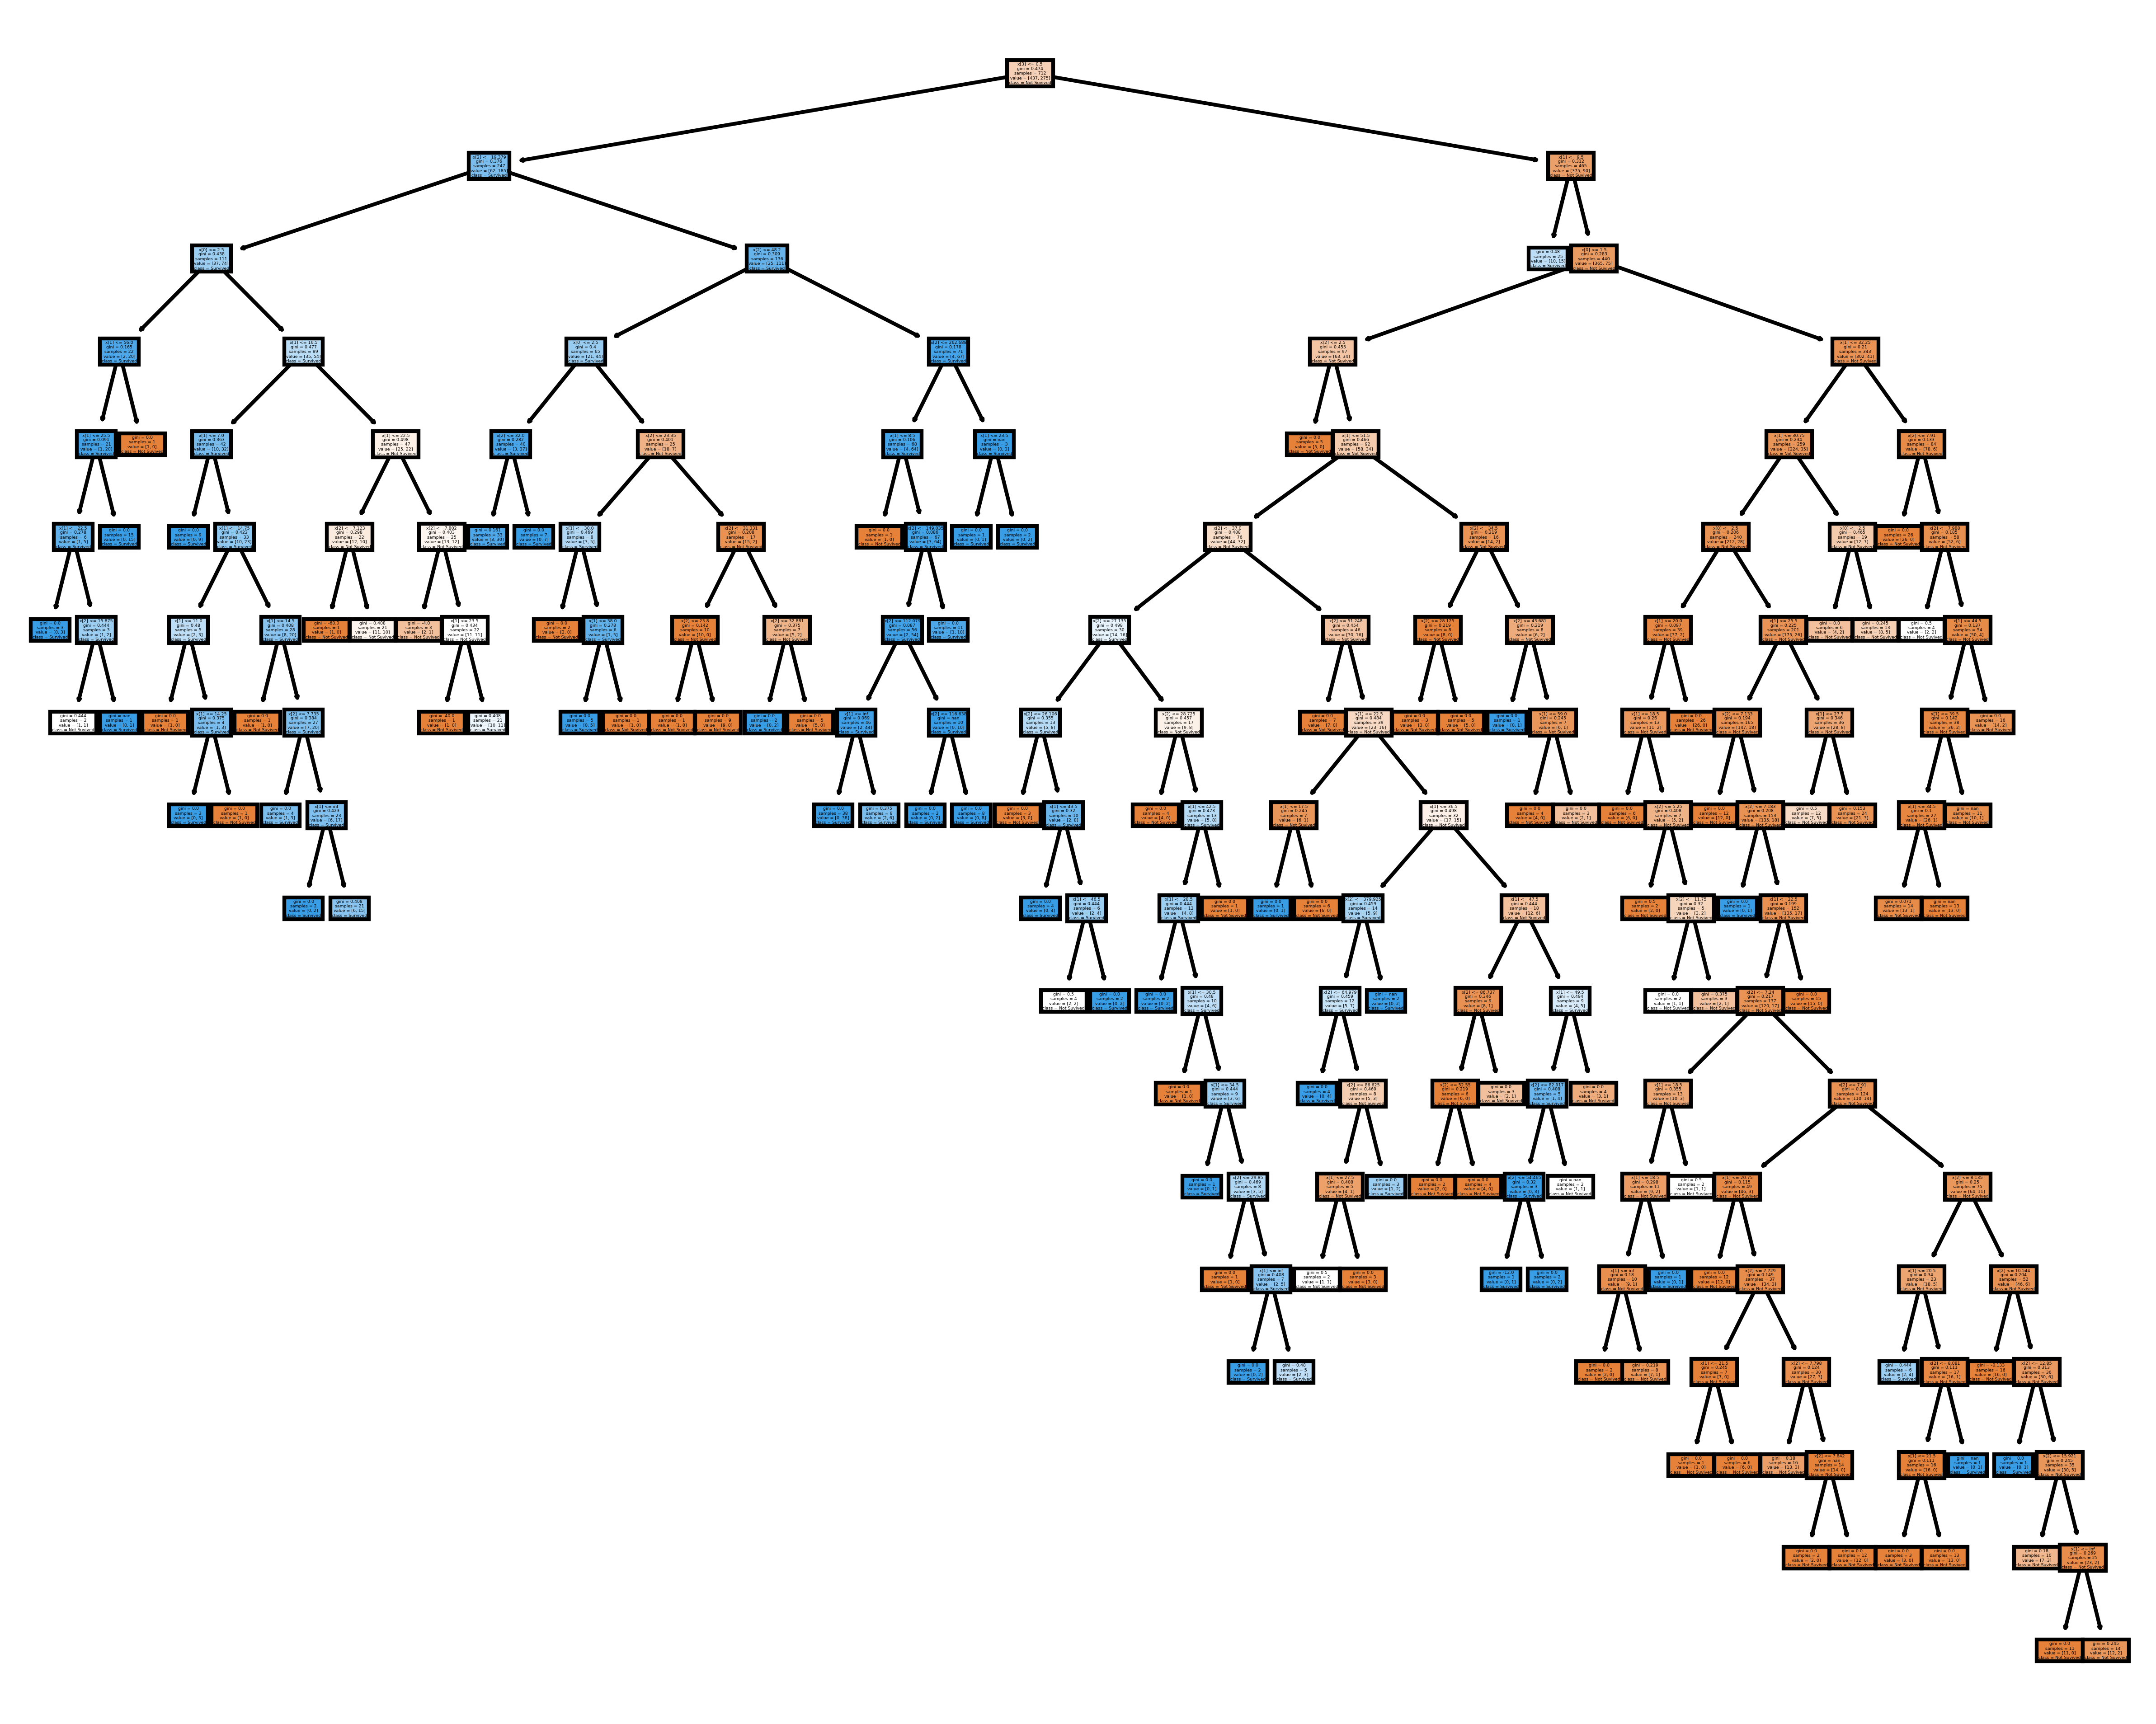

In [37]:
plt.figure(figsize=(10,8),dpi=600)
tree.plot_tree(model,class_names=['Not Suvived','Survived'],filled=True)
plt.show()